## Preparation:

In [421]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, roc_auc_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

In [371]:
train = pd.read_csv(r'https://github.com/NotYetBenGan/base/raw/main/MLZoomCamp/MidtermProject/train.csv')
test = pd.read_csv(r'https://github.com/NotYetBenGan/base/raw/main/MLZoomCamp/MidtermProject/test.csv')

In [372]:
train.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [373]:
test.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


# Exploratory data analysis 

In [374]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146000 entries, 0 to 145999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                146000 non-null  int64  
 1   MonthlyCharges            146000 non-null  float64
 2   TotalCharges              146000 non-null  float64
 3   SubscriptionType          146000 non-null  object 
 4   PaymentMethod             146000 non-null  object 
 5   PaperlessBilling          146000 non-null  object 
 6   ContentType               146000 non-null  object 
 7   MultiDeviceAccess         146000 non-null  object 
 8   DeviceRegistered          146000 non-null  object 
 9   ViewingHoursPerWeek       146000 non-null  float64
 10  AverageViewingDuration    146000 non-null  float64
 11  ContentDownloadsPerMonth  146000 non-null  int64  
 12  GenrePreference           146000 non-null  object 
 13  UserRating                146000 non-null  f

In [375]:
train.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [376]:
train.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [377]:
categorical = list(train.select_dtypes(include=['object']).dtypes.index)
categorical.remove('CustomerID')
for col in categorical:
    print(col + ' - ' + str(train[col].nunique()))

SubscriptionType - 3
PaymentMethod - 4
PaperlessBilling - 2
ContentType - 3
MultiDeviceAccess - 2
DeviceRegistered - 4
GenrePreference - 5
Gender - 2
ParentalControl - 2
SubtitlesEnabled - 2


In [378]:
numerical = list(train.select_dtypes(include=['int','float']).dtypes.index)
numerical.remove('Churn')
for col in numerical:
    print(col + ' - ' + str(train[col].nunique()))

AccountAge - 119
MonthlyCharges - 146000
TotalCharges - 146000
ViewingHoursPerWeek - 146000
AverageViewingDuration - 146000
ContentDownloadsPerMonth - 50
UserRating - 146000
SupportTicketsPerMonth - 10
WatchlistSize - 25


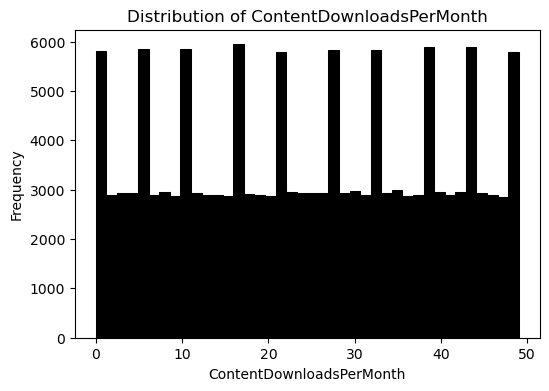

In [379]:
plt.figure(figsize=(6, 4))

sns.histplot(train.ContentDownloadsPerMonth, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('ContentDownloadsPerMonth')
plt.title('Distribution of ContentDownloadsPerMonth')

plt.show()

In [380]:
train.Churn.value_counts()

0    119469
1     26531
Name: Churn, dtype: int64

In [381]:
global_mean = train.Churn.mean()
round(global_mean, 3)

0.182

# Data preparation and data clearning

In [382]:
#There are no NULLs in this dataset, so just convert strings to ints
train.PaperlessBilling = (train.PaperlessBilling == "Yes").astype(int)
train.MultiDeviceAccess = (train.MultiDeviceAccess == "Yes").astype(int)
train.ParentalControl = (train.ParentalControl == "Yes").astype(int)
train.SubtitlesEnabled = (train.SubtitlesEnabled == "Yes").astype(int)

test.PaperlessBilling = (test.PaperlessBilling == "Yes").astype(int)
test.MultiDeviceAccess = (test.MultiDeviceAccess == "Yes").astype(int)
test.ParentalControl = (test.ParentalControl == "Yes").astype(int)
test.SubtitlesEnabled = (test.SubtitlesEnabled == "Yes").astype(int)

# Validation framework

In [383]:
np.random.seed(2)

#Let's take 20% of train dataset as val dataset
n_train = int(0.8 * len(train))
n_val = int(0.2 * len(train))
n_test = len(test)

idx = np.arange(n_train+n_val)
np.random.shuffle(idx)

df_shuffled = train.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = test.copy()

In [384]:
y_train = df_train.Churn.values
y_val = df_val.Churn.values

In [385]:
del df_train['Churn']
del df_val['Churn']

# Feature importance

In [386]:
female_mean = train[train.Gender == 'Female'].Churn.mean()
print('Gender == Female:', round(female_mean, 3))

male_mean = train[train.Gender == 'Male'].Churn.mean()
print('Gender == Male:  ', round(male_mean, 3))

Gender == Female: 0.178
Gender == Male:   0.185


In [387]:
train.SubscriptionType.value_counts()

Standard    49122
Basic       48770
Premium     48108
Name: SubscriptionType, dtype: int64

In [388]:
standard_mean = train[train.SubscriptionType == 'Standard'].Churn.mean()
print('SubscriptionType == Standard:  ', round(standard_mean, 3))

basic_mean = train[train.SubscriptionType == 'Basic'].Churn.mean()
print('SubscriptionType == Basic:  ', round(basic_mean, 3))

premium_mean = train[train.SubscriptionType == 'Premium'].Churn.mean()
print('SubscriptionType == Premium:  ', round(premium_mean, 3))

SubscriptionType == Standard:   0.184
SubscriptionType == Basic:   0.197
SubscriptionType == Premium:   0.164


In [389]:
#Calculate feature importance for categoraical
for col in categorical:
    df_group = train.groupby(by=col).Churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
SubscriptionType,,,
Basic,0.197416,0.015697,1.086382
Premium,0.163757,-0.017963,0.901152
Standard,0.183726,0.002007,1.011045


,mean,diff,risk
PaymentMethod,,,
Bank transfer,0.180250,-0.001469,0.991916
Credit card,0.163480,-0.018239,0.899630
Electronic check,0.192088,0.010369,1.057058
Mailed check,0.190996,0.009277,1.051049


,mean,diff,risk
PaperlessBilling,,,
0,0.182673,0.000954,1.005249
1,0.180764,-0.000955,0.994743


,mean,diff,risk
ContentType,,,
Both,0.189079,0.007360,1.040503
Movies,0.178415,-0.003304,0.981820
TV Shows,0.177597,-0.004122,0.977317


,mean,diff,risk
MultiDeviceAccess,,,
0,0.181413,-0.000306,0.998317
1,0.182025,0.000306,1.001682


,mean,diff,risk
DeviceRegistered,,,
Computer,0.181391,-0.000328,0.998193
Mobile,0.184144,0.002424,1.013342
TV,0.179235,-0.002485,0.986328
Tablet,0.182092,0.000373,1.002054


,mean,diff,risk
GenrePreference,,,
Action,0.167590,-0.014129,0.922249
Comedy,0.193974,0.012255,1.067440
Drama,0.179094,-0.002625,0.985552
Fantasy,0.176687,-0.005032,0.972307
Sci-Fi,0.191325,0.009606,1.052860


,mean,diff,risk
Gender,,,
Female,0.178315,-0.003404,0.981266
Male,0.185133,0.003414,1.018785


,mean,diff,risk
ParentalControl,,,
0,0.183557,0.001838,1.010112
1,0.179887,-0.001832,0.989918


,mean,diff,risk
SubtitlesEnabled,,,
0,0.186905,0.005185,1.028535
1,0.176570,-0.005149,0.971665


In [390]:
df_group = train.groupby(['ContentDownloadsPerMonth'], as_index=False)['Churn'].mean()

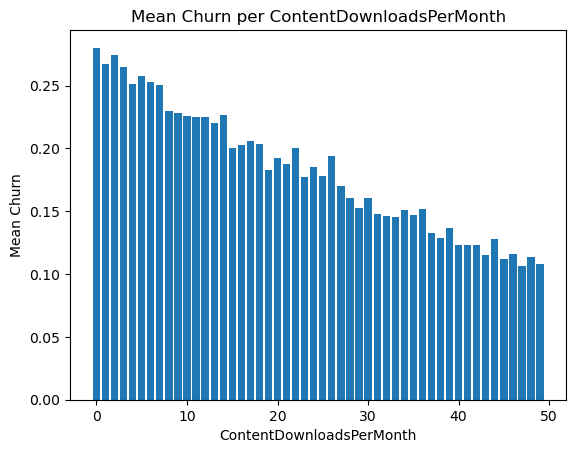

In [391]:
plt.bar(df_group['ContentDownloadsPerMonth'], df_group['Churn'], align='center')
plt.xlabel('ContentDownloadsPerMonth') 
plt.ylabel('Mean Churn')
plt.title('Mean Churn per ContentDownloadsPerMonth')
plt.show()

# Model training - Classification

In [424]:
def train(df, y, C=10):
    dct = df[categorical+numerical].to_dict(orient='records')
    #Prepare one-hot encoding for train and validation datasets
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dct)
    #Train logistic regression model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X, y)
    return dv, model


def predict(df, dv, model):
    dct = df[categorical+numerical].to_dict(orient='records')
    X = dv.transform(dct)
    #Predict Churn rate for validation dataset
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [430]:
dv, model_C_10 = train(df_train, y_train, 10)
y_pred = predict(df_val, dv, model_C_10)

In [431]:
auc = roc_auc_score(y_val, y_pred)
print('auc = %.3f' % auc)

auc = 0.754


# Tried multiple thresholds

In [419]:
#Accuracies
scores = []
tresholdes = np.linspace(0,1,21)

for t in tresholdes:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.183
0.05 0.301
0.10 0.486
0.15 0.616
0.20 0.704
0.25 0.760
0.30 0.794
0.35 0.811
0.40 0.820
0.45 0.824
0.50 0.824
0.55 0.824
0.60 0.821
0.65 0.819
0.70 0.818
0.75 0.817
0.80 0.817
0.85 0.817
0.90 0.817
0.95 0.817
1.00 0.817


In [408]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [413]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,5342,23858,0,0,1.000000,1.000000
10,0.1,4773,14446,569,9412,0.893486,0.605499
20,0.2,3532,6831,1810,17027,0.661176,0.286319
30,0.3,2285,2964,3057,20894,0.427742,0.124235
40,0.4,1278,1189,4064,22669,0.239236,0.049837
50,0.5,637,424,4705,23434,0.119244,0.017772
60,0.6,228,105,5114,23753,0.042681,0.004401
70,0.7,41,18,5301,23840,0.007675,0.000754
80,0.8,3,1,5339,23857,0.000562,0.000042
90,0.9,0,0,5342,23858,0.000000,0.000000


In [3]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the linear model')

plt.show()

NameError: name 'plt' is not defined

# Load the model

In [427]:
import pickle

In [432]:
model_C_10_file = 'model_C=10.bin'

In [433]:
with open(model_C_10_file, 'wb') as f_out: # 'wb' means write-
    pickle.dump((dv, model_C_10), f_out)

#Restart the Kernel here

In [1]:
import pickle

model_C_10_file = 'model_C=10.bin'

with open(model_C_10_file, 'rb') as f_in: # very important to use 'rb' here, it means read-binary 
    dv, model_C_10_file = pickle.load(f_in)

In [2]:
dv, model_C_10_file

(DictVectorizer(sparse=False),
 LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear'))